In [15]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [16]:
data=pd.read_csv("fetal_health.csv")

In [17]:
data.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.0,2126.000000,2126.000000,2126.000000,2126.000000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003026,0.004255,0.004352,0.001638,0.0,0.000057,46.990122,1.274412,7.742709,...,93.579492,163.559737,3.970367,0.273754,138.544214,135.221543,138.391816,15.879116,0.320320,1.304327
std,9.840844,0.003622,0.013543,0.002922,0.002549,0.0,0.000364,17.192814,0.749691,14.636140,...,29.560212,17.046344,2.794712,0.548227,14.072106,14.466654,13.766739,21.072401,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,12.000000,0.200000,0.000000,...,50.000000,122.000000,0.000000,0.000000,89.000000,88.000000,95.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.0,0.000000,32.000000,0.700000,0.000000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.0,0.000000,49.000000,1.200000,0.000000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.005000,0.002000,0.007000,0.003000,0.0,0.000000,61.000000,1.700000,8.000000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,22.000000,1.000000,1.000000
max,160.000000,0.014000,0.189000,0.013000,0.010000,0.0,0.005000,87.000000,3.900000,65.000000,...,159.000000,213.000000,12.000000,2.000000,186.000000,180.000000,180.000000,104.000000,1.000000,3.000000


In [18]:
data.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [19]:
#seperate target from features
X=data.drop(['fetal_health'],axis=1)
y=data['fetal_health']

Text(0.5, 1.0, 'Number of samples of each class')

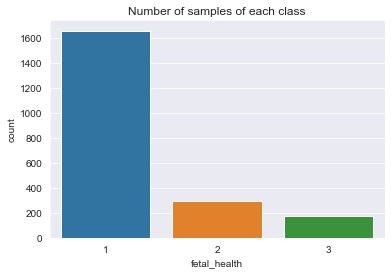

In [20]:
#DATA VISUALIZATION
import seaborn as sns
sns.set_style(style='darkgrid')
sns.countplot(data=data,x='fetal_health')
plt.title("Number of samples of each class")

<AxesSubplot:>

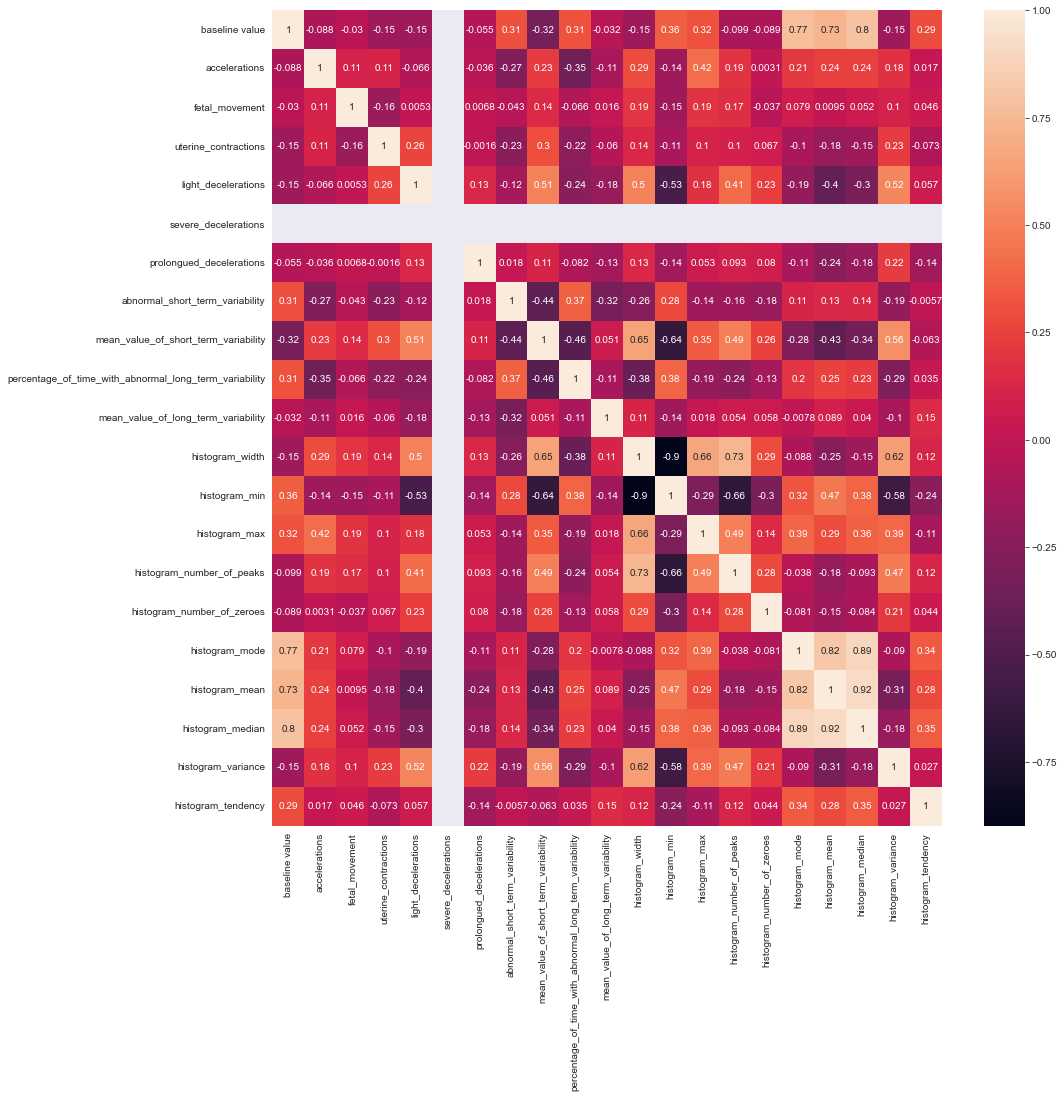

In [21]:
#confusion matrix
corr=X.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr,annot=True)

In [4]:
#Oversampling of Minority Class

from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='not majority')
X_over, y_over = oversample.fit_resample(X, y)

In [ ]:
#Data visualization after OverSampling
sns.countplot(data=pd.DataFrame(y_over),x='fetal_health')

In [5]:
#scailing data 
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X_over)

In [6]:
#number of features selected after applying this code will be greater than or equal to 1 and less than or equal to 21.
#reduce the dimensionality
from sklearn.decomposition import PCA
pca=PCA(n_components=0.95) #0.95 here refers that the total variance explained by the components must be atleast 95%
X_pca_final=pca.fit_transform(X_scaled)
X_pca_final=pd.DataFrame(X_pca_final)
X_pca_final.head()

,0,1,2,3,4,5,6,7,8,9
0,-1.332516,0.551097,-1.797103,0.108978,-0.844020,-3.124561,1.446784,0.971252,0.306503,0.392310
1,-1.034714,1.708943,2.879320,0.217305,0.704384,1.222337,0.369700,-0.314058,-0.498523,-0.260041
2,-1.116495,1.406039,1.725745,0.826926,1.466935,1.282713,0.147336,-0.501572,-0.749627,-0.282184
3,-1.100653,1.190554,1.797907,0.764727,3.108301,0.787145,0.516241,0.615908,0.001080,-0.055854
4,-0.999011,1.224870,3.474786,-0.301902,2.363643,0.154423,0.821611,0.340848,0.158067,-0.526109


In [13]:
#Model Building (Data Splitting)

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X_pca_final,y_over,random_state=42,stratify=y_over)

In [ ]:
#randomized search cross-validation technique to find the best hyperparameters for the SVM model
#Support Vector Machine
param_grid={'C':[0.001,0.01,0.1,1,10,100], 'gamma':[0.001,0.01,0.1,1,10,100]}
rcv=RandomizedSearchCV(SVC(),param_grid,cv=5)
rcv.fit(X_train,y_train)
y_pred_svc=rcv.predict(X_test)

#confusion matrix
confusion_svc=confusion_matrix(y_test,rcv.predict(X_test))
sns.heatmap(confusion_svc,annot=True, cmap='Blues')
print(classification_report(y_test,y_pred_svc,digits=4))

#Print number of features selected for each classifier
print("Number of features selected for SVM: ", pca.n_components_)



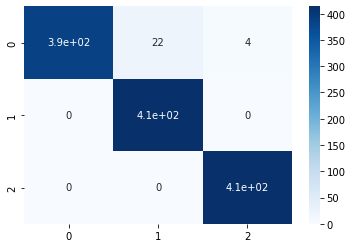

              precision    recall  f1-score   support

           1     1.0000    0.9372    0.9676       414
           2     0.9495    1.0000    0.9741       414
           3     0.9904    1.0000    0.9952       414

    accuracy                         0.9791      1242
   macro avg     0.9800    0.9791    0.9790      1242
weighted avg     0.9800    0.9791    0.9790      1242

Number of selected features: 10


In [9]:
# Train the Random Forest model
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rfc.predict(X_test)

# Show the confusion matrix using a heatmap
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.show()

# Print the classification report
print(classification_report(y_test, y_pred,digits=4))
# Print the number of selected features
print("Number of selected features:", pca.n_components_)

              precision    recall  f1-score   support

           1     0.9922    0.9179    0.9536       414
           2     0.9427    0.9928    0.9671       414
           3     0.9787    1.0000    0.9892       414

    accuracy                         0.9702      1242
   macro avg     0.9712    0.9702    0.9700      1242
weighted avg     0.9712    0.9702    0.9700      1242

Number of selected features: 10


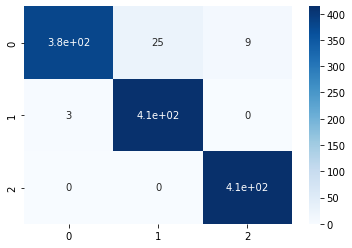

In [8]:
# Train the Decision Tree model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict the target values for the test set
y_pred = clf.predict(X_test)

# Generate the confusion matrix and plot it using a heatmap
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues')

# Print the classification report
print(classification_report(y_test, y_pred,digits=4))
# Print the number of selected features
print("Number of selected features:", pca.n_components_)